# Example notebook for running WOFOST
[Here](https://pcse.readthedocs.io/en/master/reference_guide.html) is an overview of the PCSE (Python crop simulation environment). 

In [1]:
import simulate_wofost
import process_data
import os

Platform not recognized, using system temp directory for PCSE settings.
Platform not recognized, using system temp directory for PCSE settings.


## Load WOFOST inputs from local files

In [2]:
import pandas as pd
import yaml
from pcse.fileinput import CABOFileReader
from pcse.fileinput import ExcelWeatherDataProvider

In [3]:
crop_data_path = os.path.join('example_data', 'crop.cab')
cropd = CABOFileReader(crop_data_path)
print(cropd)

** $Id: wwh102.cab 1.3 1997/09/25 14:07:03 LEM release $
** File WWH102.CAB
** CROP DATA FILE for use with WOFOST Version 5.4, June 1992
**
** WHEAT, WINTER 102
** Regions: Ireland, central en southern UK (R72-R79),
**          Netherlands (not R47), northern Germany (R11-R14)
** start date 1 January
** mean date of flowering 10 Jun, mature 1-25 Aug
** Derived from SUCROS87 data set for wheat.
** Calibrated for use in WOFOST model at the Centre for Agrobiological
** Research (CABO-DLO) for the simulation of crop growth and yield on the
** basis of daily weather data.
** Purpose of application: Crop growth monitoring with agrometeorological
** model in the EC.
** Developed in the framework of JRC Agriculture Project Action 3.
------------------------------------
TBASEM: -10.0 <class 'float'>
TEFFMX: 30.0 <class 'float'>
TSUMEM: 0.0 <class 'float'>
IDSL: 0 <class 'int'>
DLO: -99.0 <class 'float'>
DLC: -99.0 <class 'float'>
TSUM1: 1050.0 <class 'float'>
TSUM2: 1000.0 <class 'float'>
DVSI:

In [4]:
soil_data_path = os.path.join('example_data', 'soil.cab')
soild = CABOFileReader(soil_data_path)
print(soild)

** $Id: ec4.new 1.2 1997/09/18 17:33:54 LEM release $
**
** SOIL DATA FILE for use with WOFOST Version 5.0, June 1990
**
** EC-4 fine
------------------------------------
SMW: 0.3 <class 'float'>
SMFCF: 0.46 <class 'float'>
SM0: 0.57 <class 'float'>
CRAIRC: 0.05 <class 'float'>
RDMSOL: 120.0 <class 'float'>
K0: 10.789 <class 'float'>
SOPE: 0.55 <class 'float'>
KSUB: 0.37 <class 'float'>
SPADS: 0.05 <class 'float'>
SPODS: 0.025 <class 'float'>
SPASS: 0.1 <class 'float'>
SPOSS: 0.04 <class 'float'>
DEFLIM: -0.3 <class 'float'>
SOLNAM: EC4-fine <class 'str'>
SMTAB: [-1.0, 0.57, 1.0, 0.533, 1.3, 0.524, 1.491, 0.515, 2.0, 0.486, 2.4, 0.451, 2.7, 0.42, 3.4, 0.35, 4.204, 0.3, 6.0, 0.27] <class 'list'>
CONTAB: [0.0, 1.033, 1.0, -0.824, 1.3, -1.155, 1.491, -1.398, 1.7, -1.523, 2.0, -1.959, 2.4, -2.495, 2.7, -2.886, 3.0, -3.276, 3.4, -3.77, 3.7, -4.131, 4.0, -4.481, 4.204, -4.745] <class 'list'>



In [5]:
site_data_path = os.path.join('example_data', 'site.cab')
sited = CABOFileReader(site_data_path)
print(sited)

**
** Site characteristics file for Running WOFOST N/P/K
** Derived from management data file for use with LINTUL model (May 2011)
**
------------------------------------
SMLIM: 0.3 <class 'float'>
IFUNRN: 0 <class 'int'>
SSMAX: 0.0 <class 'float'>
SSI: 0.0 <class 'float'>
WAV: 50 <class 'int'>
NOTINF: 0.0 <class 'float'>
BG_N_SUPPLY: 0.091 <class 'float'>
NSOILBASE: 10.0 <class 'float'>
NSOILBASE_FR: 0.025 <class 'float'>
BG_P_SUPPLY: 0.091 <class 'float'>
PSOILBASE: 10.0 <class 'float'>
PSOILBASE_FR: 0.025 <class 'float'>
BG_K_SUPPLY: 0.091 <class 'float'>
KSOILBASE: 10.0 <class 'float'>
KSOILBASE_FR: 0.025 <class 'float'>



In [6]:
weather_data_path = os.path.join('example_data', 'meteo.xls')
wdp = ExcelWeatherDataProvider(weather_data_path)
print(wdp)

Weather data provided by: ExcelWeatherDataProvider
--------Description---------
Weather data for:
Country: Netherlands
Station: Wageningen, Location Haarweg
Description: Observed data from Station Haarweg in Wageningen
Source: Meteorology and Air Quality Group, Wageningen University
Contact: Peter Uithol
----Site characteristics----
Elevation:    7.0
Latitude:  51.970
Longitude:  5.670
Data available for 2004-01-02 - 2008-12-31
Number of missing days: 0



In [7]:
agro_data_path = os.path.join('example_data', 'agro.yaml')
with open(agro_data_path, 'r') as stream:
    agro = yaml.safe_load(stream)
print(agro)

{'Version': 1.0, 'AgroManagement': [{datetime.date(2004, 1, 2): {'CropCalendar': {'crop_name': 'wheat', 'variety_name': 'winter-wheat', 'crop_start_date': datetime.date(2004, 1, 2), 'crop_start_type': 'emergence', 'crop_end_date': datetime.date(2004, 4, 11), 'crop_end_type': 'maturity', 'max_duration': 200}, 'TimedEvents': [{'event_signal': 'irrigate', 'name': 'Irrigation application table', 'comment': 'All irrigation amounts in cm', 'events_table': [{datetime.date(2004, 1, 15): {'amount': 10, 'efficiency': 0.7}}, {datetime.date(2004, 2, 15): {'amount': 5, 'efficiency': 0.7}}]}, {'event_signal': 'apply_npk', 'name': 'Timed N/P/K application table', 'comment': 'All fertilizer amounts in kg/ha', 'events_table': [{datetime.date(2004, 1, 2): {'N_amount': 15, 'P_amount': 15, 'K_amount': 15, 'N_recovery': 0.7, 'P_recovery': 0.7, 'K_recovery': 0.7}}, {datetime.date(2004, 2, 1): {'N_amount': 20, 'P_amount': 10, 'K_amount': 10, 'N_recovery': 0.7, 'P_recovery': 0.7, 'K_recovery': 0.7}}]}], 'Stat

In [8]:
from pcse.base import ParameterProvider
params = ParameterProvider(cropdata=cropd,
                           sitedata=sited,
                           soildata=soild)
print(params)

ParameterProvider providing 123 parameters, 0 parameters overridden: dict_keys([]).


## Run WOFOST simulation

In [9]:
# Run WOFOST and get summary output
model='wlp'
result = simulate_wofost.run_wofost(params, wdp, agro, model)
print(result)

{'DVS': 1.78575, 'LAIMAX': 3.04911016313037, 'TAGP': 16476.370562738775, 'TWSO': 9222.779649878874, 'TWLV': 1440.307010910552, 'TWST': 5813.283901949348, 'TWRT': 682.3212145290954, 'CTRAT': 20.07638048832459, 'RD': 120.0, 'DOS': None, 'DOE': datetime.date(2004, 1, 2), 'DOA': datetime.date(2004, 5, 30), 'DOM': None, 'DOH': None, 'DOV': None}


In [10]:
# Run WOFOST and plot time series
sim = process_data.get_wofost_model(model, params, wdp, agro)
sim.run_till_terminate()
output = sim.get_output()

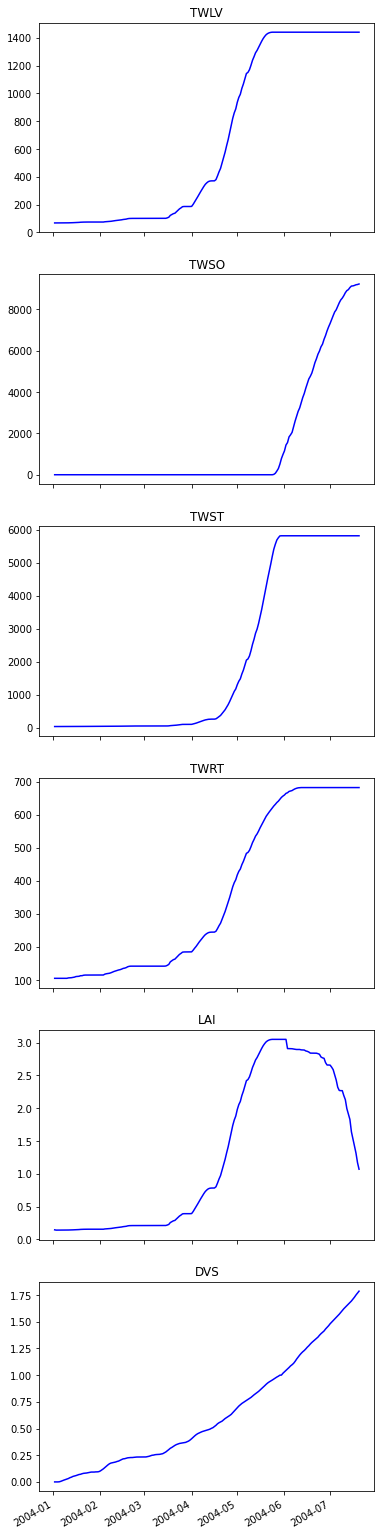

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline
varnames = ["TWLV", "TWSO", "TWST", "TWRT", "LAI",  "DVS",]
def plot_wofost_vars(varnames):
    tmp_varnames = ["day"] + varnames
    tmp = {}
    for var in tmp_varnames:
        tmp[var] = [t[var] for t in output]
    day = tmp.pop("day")
    fig, axes = plt.subplots(nrows=len(varnames), ncols=1, figsize=(6,30))
    for var, ax in zip(varnames, axes.flatten()):
        ax.plot_date(day, tmp[var], 'b-')
        ax.set_title(var)
        fig.autofmt_xdate()
plot_wofost_vars(varnames)

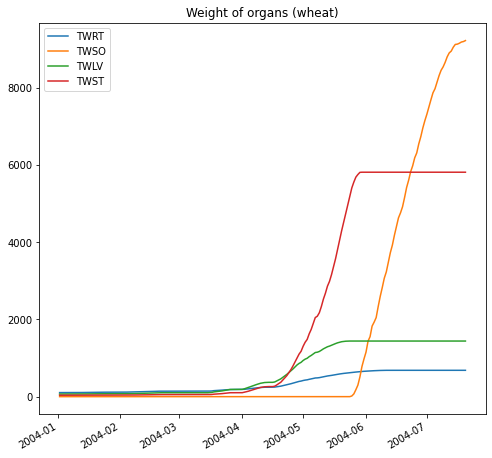

In [12]:
%matplotlib inline
varnames = ["TWRT", "TWSO",  "TWLV", "TWST"]
def plot_wofost_vars_together(varnames, crop_name):
    tmp_varnames = ["day"] + varnames
    tmp = {}
    for var in tmp_varnames:
        tmp[var] = [t[var] for t in output]
    day = tmp.pop("day")
    fig = plt.figure(figsize=(8, 8))
    for var in varnames:
        plt.plot(day, tmp[var], label=var)
    plt.legend()
    plt.title(f'Weight of organs ({crop_name})')
    fig.autofmt_xdate()

plot_wofost_vars_together(varnames, crop_name='wheat')

## Retrieve WOFOST inputs from databases

In [13]:
from pcse.db import NASAPowerWeatherDataProvider

crop_name = 'maize'
variety_name = 'Grain_maize_201'
cropd = process_data.get_crop_data(crop_name,
                                   variety_name)

sited = process_data.get_site_data(CO2=360, WAV=100)

yield_df = pd.read_csv(os.path.abspath('us_data/yield_data/maize_nonirrigated_bu_acre_augmented.csv'))
row = yield_df.iloc[707]
latitude, longitude = row['latitude'], row['longitude']
year = row['Year']
state = row['State']
county = row['County']


soil_df_path = os.path.abspath('us_data/soil/soils_locationswcoordinates.csv')
soil_df = process_data.process_soil_data(pd.read_csv(soil_df_path))

soil_id, soil_prop = row['soil_newsuid'], row['soil_prop'] #'WD40004838', 100
soil_row = process_data.get_soil_row(soil_df, soil_id, soil_prop)
soild = process_data.update_soil_params(soil_df, soil_row, default_soil_file=soil_data_path)

params = ParameterProvider(cropdata=cropd,
                           sitedata=sited,
                           soildata=soild)

wdp = NASAPowerWeatherDataProvider(latitude=latitude,
                                   longitude=longitude)

cal_dir = os.path.abspath('us_data/calendar_usda/')
plant_df, harvest_df = simulate_wofost.get_crop_calendar_df(crop_name, cal_dir=cal_dir)
year = 2010
state = 'NE'
crop_start_date, crop_end_date = simulate_wofost.get_crop_dates(year, state, plant_df, harvest_df)
agro = process_data.generate_agro(crop_name, 
                                  variety_name, 
                                  crop_start_date, 
                                  crop_end_date)

/Users/sulekahraman/Desktop/wofost-study/venv/lib/python3.9/site-packages/pandas/core/frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [14]:
# Run WOFOST and get summary output
model='wlp'
result = simulate_wofost.run_wofost(params, wdp, agro, model)
print(result)

{'DVS': 2.0, 'LAIMAX': 5.165822236811977, 'TAGP': 19750.52665459655, 'TWSO': 9476.084431213905, 'TWLV': 3240.7892708806553, 'TWST': 7033.65295250199, 'TWRT': 1794.7079645611195, 'CTRAT': 33.615494762626035, 'RD': 100.0, 'DOS': datetime.date(2010, 5, 2), 'DOE': datetime.date(2010, 5, 18), 'DOA': datetime.date(2010, 7, 3), 'DOM': datetime.date(2010, 8, 15), 'DOH': datetime.date(2010, 10, 17), 'DOV': None}


In [15]:
# Run WOFOST and plot time series
sim = process_data.get_wofost_model(model, params, wdp, agro)
sim.run_till_terminate()
output = sim.get_output()

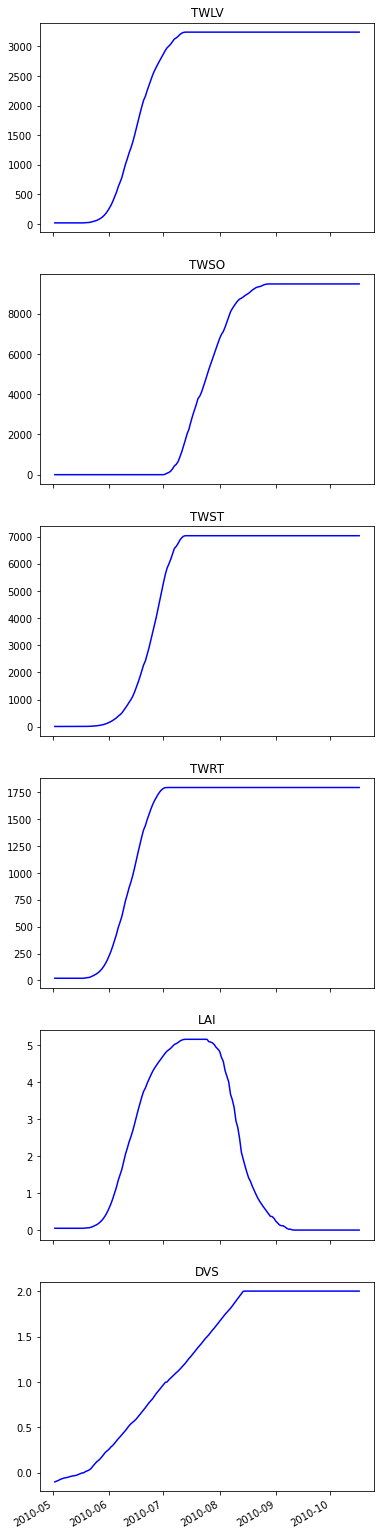

In [16]:
varnames = ["TWLV", "TWSO", "TWST", "TWRT", "LAI",  "DVS",]
plot_wofost_vars(varnames)

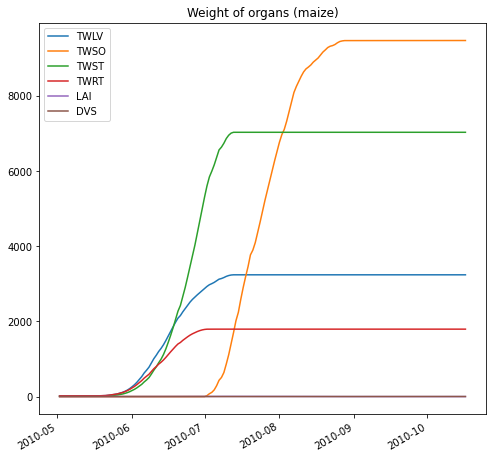

In [17]:
plot_wofost_vars_together(varnames, crop_name='maize')